Nama: Ngurah Gde Ariwhrihaspati
<br>Email: whrihaspati@gmail.com
<br>Nomor Registrasi DTS FGA 2022 ML Developer: 
1494037162101-947

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d arashnic/learn-time-series-forecasting-from-gold-price

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 55.3MB/s]


In [ ]:
!unzip /content/learn-time-series-forecasting-from-gold-price.zip && rm /content/learn-time-series-forecasting-from-gold-prices.zip

Archive:  /content/learn-time-series-forecasting-from-gold-price.zip
  inflating: gold_price_data.csv     
rm: cannot remove '/content/learn-time-series-forecasting-from-gold-prices.zip': No such file or directory


In [ ]:
import pandas as pd

df = pd.read_csv('gold_price_data.csv')
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
# filter = {'month': ['03','06','09','12'], 'day':['01','01','01','01']}

# sample_filtering = pd.DataFrame(data=filter)
# sample_filtering.head()

# sample = pd.concat([dataset.loc[dataset.index.month.astype(str).isin([sample_filtering.month]) & \
#                                 dataset.index.day.astype(str).isin([sample_filtering.day])] \
#                                 for sample_filtering in sample_filtering.itertuples()])


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
dataset = df.set_index(['Date'])

In [ ]:
print(dataset.shape)
print(dataset)
print(type(dataset))

(10787, 1)
              Value
Date               
1970-01-01    35.20
1970-04-01    35.10
1970-07-01    35.40
1970-10-01    36.20
1971-01-01    37.40
...             ...
2020-03-09  1672.50
2020-03-10  1655.70
2020-03-11  1653.75
2020-03-12  1570.70
2020-03-13  1562.80

[10787 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# from datetime import datetime

# dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
# indexedDataset = dataset.set_index(['Date'])
# indexedDataset.groupby(by=[indexedDataset.index.month, indexedDataset.index.year])
# indexedDataset.tail()

In [ ]:
# print(indexedDataset.shape)
# print(dataset.shape)

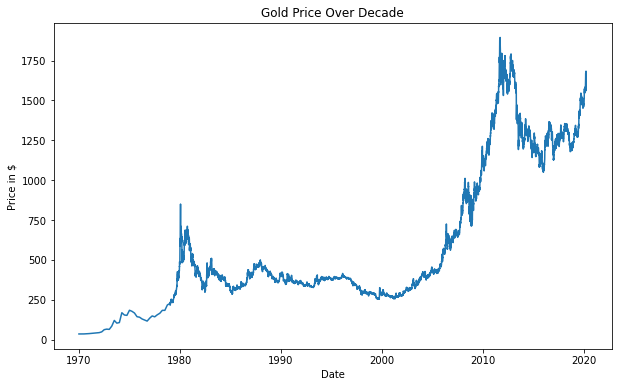

In [ ]:
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.title('Gold Price Over Decade')
plt.plot(dataset)

In [ ]:
timestep = 100

rolmean = dataset.rolling(window=100).mean()
rolstd = dataset.rolling(window=100).std()
print(rolmean, rolstd)

                Value
Date                 
1970-01-01        NaN
1970-04-01        NaN
1970-07-01        NaN
1970-10-01        NaN
1971-01-01        NaN
...               ...
2020-03-09  1530.3655
2020-03-10  1532.0690
2020-03-11  1533.6620
2020-03-12  1534.4035
2020-03-13  1534.8970

[10787 rows x 1 columns]                 Value
Date                 
1970-01-01        NaN
1970-04-01        NaN
1970-07-01        NaN
1970-10-01        NaN
1971-01-01        NaN
...               ...
2020-03-09  61.891783
2020-03-10  62.975130
2020-03-11  64.020053
2020-03-12  64.015282
2020-03-13  64.042334

[10787 rows x 1 columns]


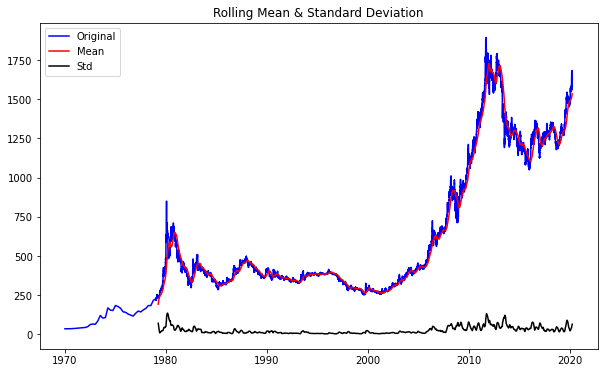

In [ ]:
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='black', label='Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
data = dataset.values

print(data.shape)
print(data)
print(type(data))

(10787, 1)
[[  35.2 ]
 [  35.1 ]
 [  35.4 ]
 ...
 [1653.75]
 [1570.7 ]
 [1562.8 ]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data.shape)
print(scaled_data)
print(type(scaled_data))

(10787, 1)
[[5.37663315e-05]
 [0.00000000e+00]
 [1.61298995e-04]
 ...
 [8.70288725e-01]
 [8.25635787e-01]
 [8.21388247e-01]]
<class 'numpy.ndarray'>


In [66]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_data, test_size=0.2, shuffle=False)
print(train.shape)
print(test.shape)

(8629, 1)
(2158, 1)


In [67]:
X_train = []
y_train = []
time_step = 100
n_cols = 1

for i in range(time_step, len(train)):
  X_train.append(train[i-time_step:i, :n_cols])
  y_train.append(train[i, :n_cols])

In [68]:
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(8529, 100, 1)
(8529, 1)


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences= True, input_shape= (X_train.shape[1], n_cols)),
    tf.keras.layers.LSTM(60),

    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(n_cols)
])

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [99]:
! mkdir saved_model

In [104]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = '/content/saved_model/weights-imporovement-{epoch:02d}-{mae:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='mae', verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

callbacks_list = [checkpoint, early_stop]

In [105]:
model.compile(loss = tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, callbacks=callbacks_list)
model.save('malaria_model_2.h5')

Epoch 1/100
267/267 [==============================] - ETA: 0s - loss: 1.0531e-04 - mae: 0.0074
Epoch 1: mae improved from inf to 0.00743, saving model to /content/saved_model/weights-imporovement-01-0.01.hdf5
267/267 [==============================] - 21s 68ms/step - loss: 1.0531e-04 - mae: 0.0074
Epoch 2/100
267/267 [==============================] - ETA: 0s - loss: 1.0354e-04 - mae: 0.0074
Epoch 2: mae improved from 0.00743 to 0.00740, saving model to /content/saved_model/weights-imporovement-02-0.01.hdf5
267/267 [==============================] - 18s 68ms/step - loss: 1.0354e-04 - mae: 0.0074
Epoch 3/100
267/267 [==============================] - ETA: 0s - loss: 1.0191e-04 - mae: 0.0074
Epoch 3: mae improved from 0.00740 to 0.00736, saving model to /content/saved_model/weights-imporovement-03-0.01.hdf5
267/267 [==============================] - 19s 70ms/step - loss: 1.0191e-04 - mae: 0.0074
Epoch 4/100
267/267 [==============================] - ETA: 0s - loss: 1.0038e-04 - mae: 0.0

In [75]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [106]:
skala_data = (df['Value'].max() - df['Value'].min()) * 0.1
MAE = history.history['mae']
best_MAE = min(MAE)

print('skala data: ',skala_data)
print('MAE: ', best_MAE)
if best_MAE < skala_data:
  print('model good fit')
else:
  print('revisi model')

skala data:  185.99
MAE:  0.006788412109017372
model good fit


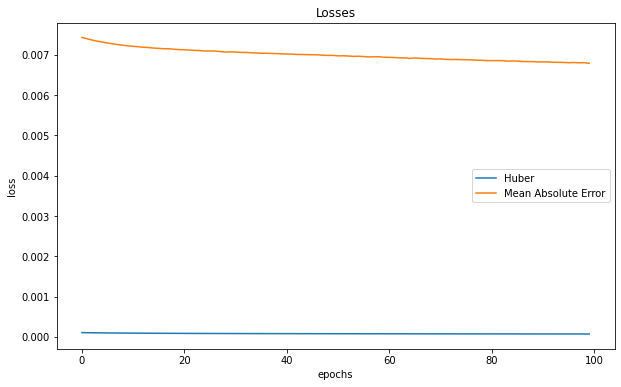

In [107]:
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['Huber','Mean Absolute Error'], loc='best')
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [110]:
time_steps = 100

X_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test)):
  X_test.append(test[i-time_steps:i, 0:n_cols])
  y_test.append(test[i, 0:n_cols])

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(2058, 100, 1) (2058, 1)


In [111]:
prediction = model.predict(X_test)
prediction

65/65 [==============================] - 2s 16ms/step


array([[0.84511626],
       [0.84466374],
       [0.84442914],
       ...,
       [0.835217  ],
       [0.8366827 ],
       [0.8368    ]], dtype=float32)

In [112]:
prediction = scaler.inverse_transform(prediction)
print(prediction.shape)
print(prediction)

(2058, 1)
[[1606.9316]
 [1606.0901]
 [1605.6537]
 ...
 [1588.52  ]
 [1591.2461]
 [1591.4642]]


In [113]:
y_test = scaler.inverse_transform(y_test)
pred_table = pd.DataFrame(data={'Prediction': prediction.flatten(), 'Actual': y_test.flatten()})
pred_table

,Prediction,Actual
0,1606.931641,1637.75
1,1606.090088,1653.50
2,1605.653687,1663.50
3,1605.717163,1651.25
4,1605.772949,1664.00
...,...,...
2053,1581.944092,1672.50
2054,1585.429565,1655.70
2055,1588.520020,1653.75
2056,1591.246094,1570.70


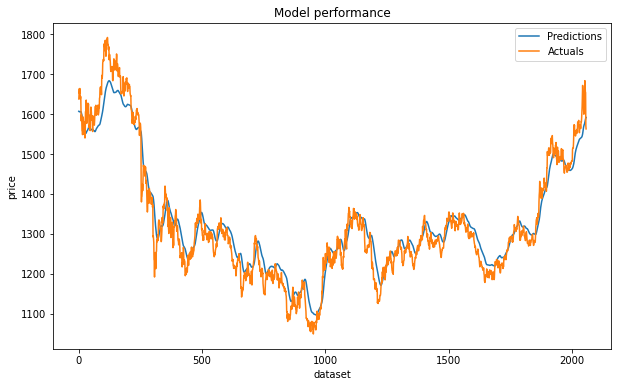

In [114]:
plt.plot(pred_table['Prediction'])
plt.plot(pred_table['Actual'])
plt.xlabel('dataset')
plt.ylabel('price')
plt.legend(['Predictions', 'Actuals'], loc='best')
plt.title('Model performance')
plt.show()